# CFDoRF - Exercise 3 - Iterative methods for solving Steady-State equations

Comparison between Jacobi and Gauss-Seidler (with and without Successive Over-Relaxation) methods for solving Poisson's equation: 

$f_{xx}+f_{yy} = S$ 

Each of these methods will be tested with the same grid and the same convergence criteria i.e. when the averaged residual between two consecutive iterations drops below a desired tolerance value.

In [1]:
# Dependancies:
import numpy as np
import timeit
from matplotlib import pyplot as plt
import pandas as pd

# Uniform source term: 
S = 0 

# Discretization along x:
Lx = 2.0 # Length
NPx = 40 # Number of points
dx = Lx/(NPx-1) # Grid step
xspan = np.linspace(0,Lx,NPx) # Discretized axis

# Discretization along y:
Ly = 1.5 # Length
NPy = 30 # Number of points
dy = Ly/(NPy-1) # Grid 
yspan = np.linspace(0,Ly,NPy) # Discretized axis

# Memory allocation (also used first guess values):
F0 = [[0.0 for j in range(NPy)] for i in range (NPx)]# list 
F0 = np.array(F0) # numpy array

# Nonzero boundary conditions:
rangeBC = range(int(1/3*NPy), int(2/3*NPy))
F0[0,rangeBC] = 1.

# Tolerance:
Tol = 1E-4

# Maximum Number of iterations:
max_iter = 10000 

# Successive over-relaxation comprised between 1 and 2:
Nb = 10 # Number of values of beta that will be tried
betas = np.linspace(1,1.999,Nb)

*1. Jacobi method:*

In [2]:
# Time:
start = timeit.default_timer()

# First guess values:
F = np.copy(F0)

for n in range(max_iter):
    
    # Auxiliary matrix for current iteration:
    Faux = np.copy(F)
    
    # Constants:
    dx2 = dx**2
    dy2 = dy**2
    
    # Internal points:
    for j in range(1,NPy-2):
        for i in range(1,NPx-2):
            F[i][j] = 1/(2/dx2+2/dy2)*((Faux[i+1,j]+Faux[i-1,j])/dx2+(Faux[i,j+1]+Faux[i,j-1])/dy2-S)
            
            
    # Check for convergence and break if condition is satisfied:
    res = np.sum(abs(F-Faux))/(NPx-1)/(NPy-1) # average residual
    
    if res < Tol:
        break
    elif n==max_iter-1:
        print("WARNING: Maximum number of iteration was reached!")

# Save values:
F_Jacobi = np.copy(F)
n_Jacobi = n
time_Jacobi = timeit.default_timer()-start

*2. Gauss-Siedler:*

In [3]:
# Allocate memory
F_GS = [[[0.0 for k in range(Nb)] for j in range(NPy)] for i in range(NPx)]
F_GS = np.array(F_GS)
n_GS = np.zeros(Nb)
time_GS = np.zeros(Nb)

for gsi in range(Nb): 

    # Time:
    start = timeit.default_timer()

    # First guess values:
    F = np.copy(F0)

    # Successive over-relaxation:
    beta = betas[gsi]

    for n in range(max_iter):

        # Auxiliary matrix for current iteration:
        Faux = np.copy(F)

        # Constants:
        dx2 = dx**2
        dy2 = dy**2

        # Internal points:
        for j in range(1,NPy-2):
            for i in range(1,NPx-2):
                F[i][j] = beta/(2/dx2+2/dy2)*((F[i+1,j]+F[i-1,j])/dx2+(F[i,j+1]+F[i,j-1])/dy2-S)+(1-beta)*F[i,j]


        # Check for convergence and break if condition is satisfied:
        res = np.sum(abs(F-Faux))/(NPx-1)/(NPy-1) # average residual

        if res < Tol:
            break
        elif n==max_iter-1:
            print("WARNING: Maximum number of iteration was reached!")

    # Save values:
    F_GS[:,:,gsi] = np.copy(F)
    n_GS[gsi] = n
    time_GS[gsi] = timeit.default_timer()-start

    # Best value of beta between those we tested:
    imin = np.argmin(n_GS)

*3. Comparing the two methods*:

In [4]:
# Performance:
print("Jacobi Method \t--\tIterations: %d   \tTime: %f s "%(n_Jacobi,time_Jacobi))

for i in range(Nb):
    if i==imin:
        print("GS Method \t--\tIterations: %d   \tTime: %f s \tbeta: %f \t<--- plotted"%(n_GS[i],time_GS[i],betas[i]))
    
    else:
        print("GS Method \t--\tIterations: %d   \tTime: %f s \tbeta: %f "%(n_GS[i],time_GS[i],betas[i]))

Jacobi Method 	--	Iterations: 223   	Time: 0.717537 s 
GS Method 	--	Iterations: 174   	Time: 0.965371 s 	beta: 1.000000 
GS Method 	--	Iterations: 156   	Time: 0.946958 s 	beta: 1.111000 
GS Method 	--	Iterations: 137   	Time: 0.733599 s 	beta: 1.222000 
GS Method 	--	Iterations: 118   	Time: 0.504997 s 	beta: 1.333000 
GS Method 	--	Iterations: 99   	Time: 0.496907 s 	beta: 1.444000 
GS Method 	--	Iterations: 80   	Time: 0.354938 s 	beta: 1.555000 
GS Method 	--	Iterations: 60   	Time: 0.259118 s 	beta: 1.666000 
GS Method 	--	Iterations: 37   	Time: 0.151559 s 	beta: 1.777000 	<--- plotted
GS Method 	--	Iterations: 42   	Time: 0.185401 s 	beta: 1.888000 
GS Method 	--	Iterations: 6332   	Time: 29.262125 s 	beta: 1.999000 


4. *Let's plot one of the results:*

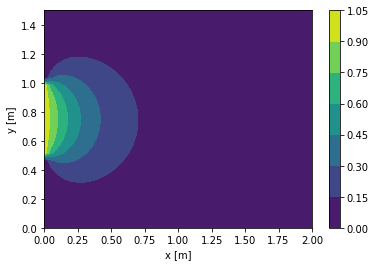

In [5]:
#Plot:
X, Y = np.meshgrid(xspan,yspan)
fig, ax = plt.subplots()
cp = ax.contourf(X, Y, np.transpose(F_GS[:,:,imin]))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
cbar = fig.colorbar(cp)